In [1]:
!pip install pydotplus

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = "ignore")

In [2]:
a=[[2,1,1],[3,2,1],[2,1,2]]
a = np.array(a)
np.linalg.inv(a)

array([[ 3., -1., -1.],
       [-4.,  2.,  1.],
       [-1.,  0.,  1.]])

In [3]:
data = pd.read_csv(r"C:\Users\I324158\OneDrive - SAP SE\Machine Learning\Dataset\IIITB Data\Lending_club\CleanData.csv")

In [4]:
data.head()
data.loan_status.unique()


array(['Charged Off', 'Fully Paid', 'Current'], dtype=object)

In [5]:
partial_data = data.iloc[:,[1,2,3,4,6,15]]

In [6]:
partial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37096 entries, 0 to 37095
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   loan_amnt        37096 non-null  int64  
 1   funded_amnt      37096 non-null  int64  
 2   funded_amnt_inv  37096 non-null  float64
 3   term             37096 non-null  int64  
 4   installment      37096 non-null  float64
 5   loan_status      37096 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 1.7+ MB


## One Hot Encoding and LabelEncoder

In [7]:
# from sklearn.preprocessing import OneHotEncoder
# o1 = OneHotEncoder(drop='first',sparse=False) # must use sprace and False.Then create DataFrame and concat
# temp1 = o1.fit_transform(partial_data[["loan_status"]])
# print(o1.categories_)
# type(temp1)
# print(temp1)
# pd.concat([partial_data,temp1],axis=1)


In [8]:
# pd.concat([partial_data,pd.DataFrame(temp1)],axis=1)


In [9]:
# from sklearn.preprocessing import LabelEncoder
# l1 = LabelEncoder()
# partial_data["loan_status"] = l1.fit_transform(partial_data["loan_status"])
# l1.classes_
# partial_data["loan_status"].head()

In [10]:
partial_data["loan_status"] = partial_data["loan_status"].map({'Charged Off':1,'Fully Paid':0,'Current':-1})

In [11]:
partial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37096 entries, 0 to 37095
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   loan_amnt        37096 non-null  int64  
 1   funded_amnt      37096 non-null  int64  
 2   funded_amnt_inv  37096 non-null  float64
 3   term             37096 non-null  int64  
 4   installment      37096 non-null  float64
 5   loan_status      37096 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1.7 MB


In [12]:
from sklearn.metrics import pairwise_distances
pairwise_distances(partial_data[["loan_amnt"]],partial_data[["funded_amnt"]])

array([[   0., 7500.,  500., ...,    0., 6000., 5000.],
       [7500.,    0., 7000., ..., 7500., 1500., 2500.],
       [ 500., 7000.,    0., ...,  500., 5500., 4500.],
       ...,
       [   0., 7500.,  500., ...,    0., 6000., 5000.],
       [6000., 1500., 5500., ..., 6000.,    0., 1000.],
       [5000., 2500., 4500., ..., 5000., 1000.,    0.]])

In [13]:
X = partial_data.iloc[:,:5]
y = partial_data.pop('loan_status')

In [14]:
# X.head()
y.head()

0    1
1    0
2   -1
3    0
4    0
Name: loan_status, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=50)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr_model = LinearRegression()

In [18]:
reg = lr_model.fit(X_train,y_train)

In [19]:
reg.coef_

array([ 3.20591494e-06, -1.56691836e-05, -1.43473246e-05,  5.02816515e-03,
        8.22032844e-04])

In [20]:
reg.score(X_train,y_train)

0.012402576397848475

In [21]:
reg.intercept_

-0.08701200525522129

In [22]:
y_pred = reg.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
mean_squared_error(y_test,y_pred)

0.1513614742292192

In [25]:
r2_score(y_test,y_pred)

0.012485352471775624

In [26]:
import matplotlib.pyplot as plt

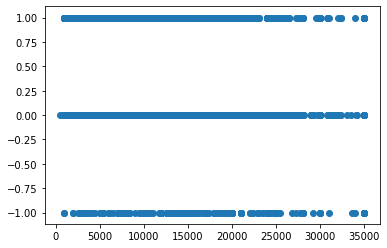

In [27]:
plt.scatter(X_test['loan_amnt'],y_test)

In [28]:
X_test.shape

(7420, 5)

In [29]:
y_test.shape

(7420,)

# Ridge Regression

In [30]:
from sklearn.linear_model import Ridge

rg_model = Ridge(alpha=0.5)
reg_rg = rg_model.fit(X_train,y_train)

In [31]:
reg_rg.score(X_train,y_train)

0.012402576397847032

In [32]:
reg_rg.coef_

array([ 3.20591546e-06, -1.56691736e-05, -1.43473244e-05,  5.02816260e-03,
        8.22032504e-04])

In [33]:
from sklearn import linear_model
reg_lasso = linear_model.Lasso(alpha=0.3).fit(X_train,y_train)

In [34]:
reg_lasso.score(X_train,y_train)

0.006656976833398609

In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [36]:
X_train_poly = PolynomialFeatures(degree=3).fit_transform(X_train)

In [37]:
reg.fit(X_train_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
reg.score(X_train_poly,y_train)

0.024912685189617978

In [39]:
X_train_poly

array([[1.00000000e+00, 1.20000000e+04, 1.20000000e+04, ...,
        4.73338080e+05, 4.80214630e+06, 4.87191082e+07],
       [1.00000000e+00, 8.00000000e+03, 8.00000000e+03, ...,
        7.35264000e+05, 2.50283866e+06, 8.51966279e+06],
       [1.00000000e+00, 4.00000000e+03, 4.00000000e+03, ...,
        1.56349440e+05, 5.23944346e+05, 1.75579572e+06],
       ...,
       [1.00000000e+00, 1.20000000e+04, 1.20000000e+04, ...,
        5.10170400e+05, 5.57857161e+06, 6.10001310e+07],
       [1.00000000e+00, 1.60000000e+04, 1.60000000e+04, ...,
        6.28871040e+05, 8.47648287e+06, 1.14253571e+08],
       [1.00000000e+00, 1.00000000e+03, 1.00000000e+03, ...,
        8.75520000e+04, 3.54877440e+04, 1.43843656e+04]])

In [40]:
reg_elaticnet = linear_model.ElasticNet(alpha=.4).fit(X_train,y_train)

In [41]:
reg_elaticnet.coef_

array([ 3.94569314e-06,  5.67689608e-06, -1.40068414e-05,  0.00000000e+00,
        1.04905669e-04])

In [42]:
reg_elaticnet.score(X_train,y_train)

0.00674104658874386

In [43]:
reg_logistic = linear_model.LogisticRegression().fit(X_train,y_train)

In [44]:
reg_logistic.score(X_train,y_train)

0.8316484701442243

In [45]:
y_pred = reg_logistic.predict(X_test)

In [46]:
reg_logistic.score(X_train,y_train)

0.8316484701442243

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(y_test,y_pred)

0.8320754716981132

In [49]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LogisticRegression(),X_train,y_train,cv=5)

array([0.82766173, 0.8316765 , 0.82847515, 0.83487784, 0.82628475])

In [50]:
from sklearn.model_selection import validation_curve
training_score ,val_score = validation_curve( linear_model.LogisticRegression(),X_train,y_train,param_name='C',param_range=[0.5,1],cv=5)

In [51]:
print(training_score)
print("---------------------")
print(val_score)

[[0.831508   0.83345268 0.83172571 0.82755571 0.83185207]
 [0.83020219 0.82789268 0.83046207 0.83442146 0.82528116]]
---------------------
[[0.83204178 0.83420388 0.831508   0.82645324 0.83218197]
 [0.82766173 0.8316765  0.82847515 0.83487784 0.82628475]]


In [52]:
val_score[0][1]

0.8342038753159224

In [53]:
train_scores, test_scores = validation_curve(linear_model.LogisticRegression(),X,y,param_name='C',param_range=[1],\
                                             scoring="accuracy", n_jobs=1)

In [54]:
print(train_scores)
print("-----------------------")
print(test_scores)

[[0.8324909  0.83215958 0.83162045 0.82953129 0.82969977]]
-----------------------
[[0.82250674 0.82800917 0.83137889 0.83569214 0.83259199]]


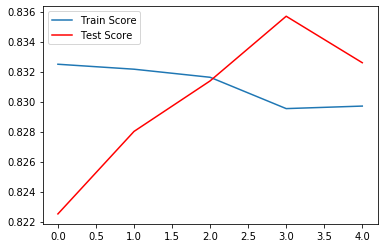

In [55]:
plt.plot(train_scores[0],label = "Train Score")
plt.plot(test_scores[0],color='red',label="Test Score")
plt.legend()

In [56]:
train_scores_mean = np.mean(train_scores, axis=1)

In [57]:
train_scores_mean

array([0.8311004])

In [58]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(linear_model.LogisticRegression(), X_train, y_train,  cv=5)

In [59]:
print(train_sizes)
print('-------------------')
print(train_scores)
print('-----------------------')
print(valid_scores)
print('--------------------------')

[ 2374  7715 13057 18398 23740]
-------------------
[[0.83529907 0.82940185 0.82940185 0.82940185 0.82940185]
 [0.8286455  0.82981205 0.83344135 0.83344135 0.83344135]
 [0.82637666 0.83457149 0.83380562 0.81856475 0.81856475]
 [0.83101424 0.83324274 0.83269921 0.8332971  0.83242744]
 [0.83020219 0.83171862 0.82780118 0.83197136 0.83226622]]
-----------------------
[[0.8328841  0.83285594 0.83218197 0.83251896 0.83319292]
 [0.82985175 0.83285594 0.83235046 0.83218197 0.83302443]
 [0.82243935 0.83319292 0.831508   0.81752317 0.82072452]
 [0.82900943 0.83302443 0.831508   0.83117102 0.83201348]
 [0.82766173 0.83285594 0.82679023 0.82931761 0.83235046]]
--------------------------


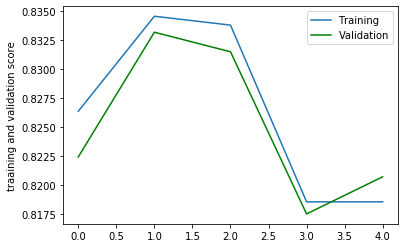

In [60]:
plt.plot(train_scores[2],label = "Training ")
plt.plot(valid_scores[2],color='green',label = "Validation")
plt.ylabel('traaining and validation score')
plt.legend()
# plt.plot(valid_scores)
plt.show()

In [61]:
train_scores

array([[0.83529907, 0.82940185, 0.82940185, 0.82940185, 0.82940185],
       [0.8286455 , 0.82981205, 0.83344135, 0.83344135, 0.83344135],
       [0.82637666, 0.83457149, 0.83380562, 0.81856475, 0.81856475],
       [0.83101424, 0.83324274, 0.83269921, 0.8332971 , 0.83242744],
       [0.83020219, 0.83171862, 0.82780118, 0.83197136, 0.83226622]])

In [62]:
valid_scores

array([[0.8328841 , 0.83285594, 0.83218197, 0.83251896, 0.83319292],
       [0.82985175, 0.83285594, 0.83235046, 0.83218197, 0.83302443],
       [0.82243935, 0.83319292, 0.831508  , 0.81752317, 0.82072452],
       [0.82900943, 0.83302443, 0.831508  , 0.83117102, 0.83201348],
       [0.82766173, 0.83285594, 0.82679023, 0.82931761, 0.83235046]])

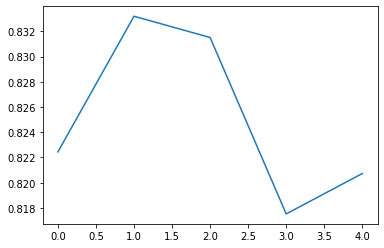

In [63]:
plt.plot(valid_scores[2])
plt.show()

__A learning curve plots the score over varying numbers of training samples,__<br>
__while a validation curve plots the score over a varying hyper parameter.__<br>
__The learning curve is a tool for finding out if an estimator would benefit from more data, or if the model is too simple (biased).__

In [64]:
from sklearn.inspection import permutation_importance
perm = permutation_importance(reg_logistic,X_train,y_train)

In [65]:
perm.importances  # Shows each feature/Variables importance 

array([[0.00350452, 0.00296536, 0.00353821, 0.00350452, 0.00303275],
       [0.22594015, 0.22620973, 0.22482814, 0.22078447, 0.22213236],
       [0.21808869, 0.21711147, 0.21785281, 0.21687559, 0.21862785],
       [0.01681493, 0.01661275, 0.01732039, 0.01735409, 0.01647796],
       [0.25266208, 0.24868581, 0.25232511, 0.25097722, 0.24949454]])

__When 2 features are correlated , and one of the feature is permuted ,Model will give 
lower importances value to both the features. Interpretation will be difficult,
Hence we need to remove always the correlated features.__


In [66]:
from sklearn.metrics import log_loss,balanced_accuracy_score
balanced_accuracy_score(y_test,y_pred)
# log_loss(y_test,y_pred)

0.3392040528604772

In [67]:
from sklearn.metrics import precision_recall_curve
# precision_recall_curve(y_test,y_pred)

In [68]:
from sklearn.metrics import precision_score
# precision_score(y_test,y_pred)

In [69]:
from sklearn.metrics import recall_score
# recall_score(y_test,y_pred)

In [70]:
from sklearn.metrics import roc_auc_score
# roc_auc_score(y_test,y_pred)

## Linear Discreminate Analysis and Quadratic Discreminate Analysis


In [71]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)

In [72]:
lda_model = lda.fit(X_train,y_train)

In [73]:
lda.classes_
lda.coef_

array([[-9.85951554e-05,  3.28609754e-04,  4.87291047e-05,
         1.25254716e-01, -7.81727610e-03],
       [ 2.83745760e-06, -3.40031311e-06,  1.41070380e-05,
        -1.46641458e-02, -4.65074441e-04],
       [ 3.13326570e-06, -4.73690025e-05, -9.61051797e-05,
         6.34459967e-02,  4.45545298e-03]])

In [74]:
lda_model.score(X_train,y_train)

0.8314462865615312

In [75]:
lda_model.explained_variance_ratio_

array([0.9070886, 0.0929114])

In [76]:
lda_model.means_

array([[17092.10213777, 16568.52731591, 16394.92761746,    60.        ,
          397.59655582],
       [10934.74022042, 10684.14072908, 10169.69062033,    41.2755238 ,
          321.7317464 ],
       [12287.35540241, 11911.77701206, 10988.99832428,    46.46714251,
          339.72608171]])

In [77]:
lda_model.decision_function(X_train)

array([[-5.94176105, -0.09096306, -2.53110884],
       [-2.79211941, -0.42220695, -1.16432463],
       [-6.25968311, -0.08556396, -2.49814075],
       ...,
       [-6.16547649, -0.10462875, -2.40143095],
       [-5.82026018, -0.10861577, -2.44866443],
       [-3.33684102, -0.43334004, -0.98356331]])

In [78]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [79]:
clf = QuadraticDiscriminantAnalysis(store_covariance=True)
temp = clf.fit(X_train,y_train)

In [80]:
clf.priors_

array([0.0283731 , 0.83471492, 0.13691198])

In [81]:
temp.covariance_  # When pass store_covariance=True

[array([[7.11176679e+07, 6.56849696e+07, 6.45553637e+07, 0.00000000e+00,
         1.61560861e+06],
        [6.56849696e+07, 6.45560104e+07, 6.34955346e+07, 0.00000000e+00,
         1.58712933e+06],
        [6.45553637e+07, 6.34955346e+07, 6.30801678e+07, 0.00000000e+00,
         1.56160012e+06],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00],
        [1.61560861e+06, 1.58712933e+06, 1.56160012e+06, 0.00000000e+00,
         4.02823750e+04]]),
 array([[5.15071810e+07, 4.88709829e+07, 4.65935907e+07, 2.34752018e+04,
         1.38021322e+06],
        [4.88709829e+07, 4.80842388e+07, 4.58791645e+07, 2.10581869e+04,
         1.37055530e+06],
        [4.65935907e+07, 4.58791645e+07, 4.73996715e+07, 2.21002533e+04,
         1.29488441e+06],
        [2.34752018e+04, 2.10581869e+04, 2.21002533e+04, 9.87854078e+01,
         1.46481574e+02],
        [1.38021322e+06, 1.37055530e+06, 1.29488441e+06, 1.46481574e+02,
         4.24934462e+04]]),
 array

## Kernel Ridge regression 

In [82]:
from sklearn.kernel_ridge import KernelRidge

In [83]:
# KernelRidge().fit()

## Support Vector Machine

In [84]:
from sklearn.svm import SVC

svc_model = SVC(kernel='rbf').fit(X_train,y_train)

In [85]:
svc_model.score(X_train,y_train)

0.8347149211484027

In [86]:
svc_model.support_vectors_

array([[14000.  , 14000.  , 13750.  ,    60.  ,   344.11],
       [ 6000.  ,  6000.  ,  6000.  ,    60.  ,   145.79],
       [15000.  , 15000.  , 15000.  ,    60.  ,   374.97],
       ...,
       [17000.  , 17000.  , 16975.  ,    60.  ,   441.28],
       [12000.  , 12000.  , 12000.  ,    36.  ,   410.66],
       [ 1000.  ,  1000.  ,  1000.  ,    60.  ,    24.32]])

## Nearest Neighbours

In [87]:
from sklearn.neighbors import NearestNeighbors
n_model = NearestNeighbors(n_neighbors=3,algorithm='ball_tree').fit(X_train)

In [88]:
n_model

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                 radius=1.0)

- Ball Tree 
- KD Tree

## Naive Bayes
- Gaussian Naive Bayes
- Multinomial Naive bayes ( Multiclass class classification )
- Bernoulli Naive Bayes
- Categorical Naive Bayes


In [89]:
from sklearn.naive_bayes import BernoulliNB
NB_model = BernoulliNB().fit(X_train,y_train)

In [90]:
NB_model

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [91]:
NB_model.score(X_train,y_train)

0.8347149211484027

In [92]:
NB_model.coef_

array([[-1.18553659e-03, -1.18553659e-03, -1.18553659e-03,
        -1.18553659e-03, -1.18553659e-03],
       [-4.03673428e-05, -4.03673428e-05, -3.07257165e-03,
        -4.03673428e-05, -4.03673428e-05],
       [-2.46032724e-04, -2.46032724e-04, -5.17944184e-03,
        -2.46032724e-04, -2.46032724e-04]])

In [93]:
NB_model.classes_

array([-1,  0,  1], dtype=int64)

In [94]:
y_pred = NB_model.predict(X_test)

In [95]:
accuracy_score(y_pred,y_test)

0.8359838274932615

## Decision Tree

In [96]:
from sklearn import tree

In [97]:
tree_model = tree.DecisionTreeClassifier().fit(X_train,y_train)

In [98]:
tree_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [99]:
tree_model.score(X_train,y_train)

0.9534977759805904

In [100]:
tree_model.feature_importances_

array([0.07535309, 0.06676846, 0.30731594, 0.06315541, 0.48740711])

In [101]:
partial_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,installment
0,2500,2500,2500.0,60,59.83
1,10000,10000,10000.0,36,339.31
2,3000,3000,3000.0,60,67.79
3,5000,5000,5000.0,36,156.46
4,7000,7000,7000.0,60,170.08


In [102]:
tree_model.max_features_

5

In [103]:
y_pred = tree_model.predict(X_test)

In [104]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7570080862533692

In [105]:
# tree.plot_tree(tree_model)

In [106]:
# pip install graphviz

In [107]:
import graphviz 
# tree.export_graphviz(tree_model)

## Ensemble Method

- Bagging 
    - RandomForest
    - ExtraTreeClassifier
- Boosting
    - AdaBoost
    - GradientTree Boosting
- VotingClassifier
- Interpretation with feature importance

In [108]:
from  sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators=100).fit(X_train,y_train)
clf_rf = RandomForestClassifier(n_estimators=100)

In [109]:
model_RF.score(X_train,y_train)

0.9534977759805904

In [110]:
y_pred = model_RF.predict(X_test)
accuracy_score(y_test,y_pred)

0.7912398921832884

In [111]:
scores= cross_val_score(clf_rf,X_train,y_train,cv=5)

In [112]:
scores.mean()

0.7925596420794001

### cross_val_score returns score of test fold where cross_val_predict returns predicted y values for the test fold.

In [113]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(clf_rf,X_train,y_train,cv=5)

In [114]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred)

0.7927955250033697

## Feature Selection
- variance Thresold
- SelectKBest

In [115]:
from sklearn.feature_selection import VarianceThreshold,SelectKBest,chi2,f_oneway,mutual_info_classif

In [116]:
VarianceThreshold(.8).fit_transform(X)

array([[ 2500.  ,  2500.  ,  2500.  ,    60.  ,    59.83],
       [10000.  , 10000.  , 10000.  ,    36.  ,   339.31],
       [ 3000.  ,  3000.  ,  3000.  ,    60.  ,    67.79],
       ...,
       [ 2500.  ,  2500.  ,  1075.  ,    36.  ,    78.42],
       [ 8500.  ,  8500.  ,   875.  ,    36.  ,   275.38],
       [ 7500.  ,  7500.  ,   800.  ,    36.  ,   255.43]])

In [117]:
schi = SelectKBest(chi2,k=3).fit_transform(X,y)
schi

array([[ 2500.,  2500.,  2500.],
       [10000., 10000., 10000.],
       [ 3000.,  3000.,  3000.],
       ...,
       [ 2500.,  2500.,  1075.],
       [ 8500.,  8500.,   875.],
       [ 7500.,  7500.,   800.]])

In [118]:
soneway= SelectKBest(f_oneway,k=3).fit_transform(X,y)
soneway
soneway

array([[ 2500.  ,    60.  ,    59.83],
       [10000.  ,    36.  ,   339.31],
       [ 3000.  ,    60.  ,    67.79],
       ...,
       [ 2500.  ,    36.  ,    78.42],
       [ 8500.  ,    36.  ,   275.38],
       [ 7500.  ,    36.  ,   255.43]])

### Mutual information methods can capture any kind of statistical dependency, but being nonparametric, they require more samples for accurate estimation.

In [119]:
s_minfo = SelectKBest(mutual_info_classif,k=3).fit_transform(X,y)
s_minfo

array([[ 2500.  ,    60.  ,    59.83],
       [10000.  ,    36.  ,   339.31],
       [ 3000.  ,    60.  ,    67.79],
       ...,
       [ 1075.  ,    36.  ,    78.42],
       [  875.  ,    36.  ,   275.38],
       [  800.  ,    36.  ,   255.43]])

In [120]:
from sklearn.feature_selection import RFE
model_RF=RandomForestClassifier(n_estimators=100)

In [121]:
rfe_ex = RFE(model_RF,n_features_to_select=2)

In [122]:
s = rfe_ex.fit(X_train,y_train)

In [123]:
s.support_

array([False, False,  True, False,  True])

In [124]:
s.ranking_ # Best is assigned as rank 1

array([3, 2, 1, 4, 1])

In [125]:
from sklearn.ensemble import ExtraTreesClassifier
clf=ExtraTreesClassifier(n_estimators=100)
clf.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [126]:
clf.feature_importances_

array([0.0757451 , 0.08232372, 0.29172862, 0.05752978, 0.49267278])

In [127]:
param_grid={"n_estimators":[100,150]}
rfc = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [128]:
gscv = GridSearchCV(rfc,param_grid=param_grid,cv=5)

In [129]:
gscv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [130]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(SelectKBest(),RandomForestClassifier())
# param_grid = {"select__k":[3,4],"n_estimators":[70,80]}
# gscv = GridSearchCV(pipe,param_grid=param_grid)

In [131]:
# gscv.fit(X_train,y_train)

## Preprocessing

In [132]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [133]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [134]:
scale = StandardScaler()
X_train_transform = scale.fit_transform(X_train)

In [135]:
X_test_transform = scale.transform(X_test)

In [136]:
X_test_transform

array([[-0.44407548, -0.42215728, -0.34642688, -0.61058041, -0.37336942],
       [ 1.17337506,  1.25574605,  1.26413207, -0.61058041,  1.68399839],
       [ 1.17337506,  1.25574605,  1.26331532, -0.61058041,  1.39841339],
       ...,
       [ 0.0950747 , -0.56198255, -0.73701745, -0.61058041, -0.51028648],
       [-0.17450039, -0.14250672, -0.07165187, -0.61058041, -0.07338478],
       [-1.1180132 , -1.12128366, -1.0509782 , -0.61058041, -1.1221993 ]])

In [137]:
X_train_transform

array([[ 0.0950747 ,  0.13714383,  0.21721417, -0.61058041,  0.18725367],
       [-0.44407548, -0.42215728, -0.34642688,  1.63778592, -0.58806385],
       [-0.98322565, -0.98145838, -0.91006794, -0.61058041, -0.99067609],
       ...,
       [ 0.0950747 ,  0.13714383,  0.21273649, -0.61058041,  0.32412257],
       [ 0.63422488,  0.69644494,  0.6208784 , -0.61058041,  0.76521414],
       [-1.38758829, -1.40093422, -1.33279873,  1.63778592, -1.45454703]])

In [138]:
scale_min = MinMaxScaler()

In [139]:
X_train_minmax = scale_min.fit_transform(X_train)

In [140]:
X_test_minmax = scale_min.transform(X_test)

In [141]:
X_train_minmax

array([[0.33333333, 0.33333333, 0.34285714, 0.        , 0.27295896],
       [0.2173913 , 0.2173913 , 0.22857143, 1.        , 0.14709998],
       [0.10144928, 0.10144928, 0.11428571, 0.        , 0.08174306],
       ...,
       [0.33333333, 0.33333333, 0.34194923, 0.        , 0.29517719],
       [0.44927536, 0.44927536, 0.42470543, 0.        , 0.36678055],
       [0.01449275, 0.01449275, 0.02857143, 1.        , 0.00644188]])

In [142]:
from sklearn.preprocessing import QuantileTransformer,PowerTransformer

In [143]:
qt = QuantileTransformer()
pt = PowerTransformer(method = 'yeo-johnson')
X_temp_qt = qt.fit_transform(X_train)
X_temp_qt_t = qt.transform(X_test)
X_temp_pt = pt.fit_transform(X_train)
X_temp_pt_t = pt.transform(X_test)

## Unsupervised Learning

In [144]:
from sklearn.mixture import GaussianMixture

In [145]:
clust = GaussianMixture(n_components=2).fit(X_train)

In [146]:
from sklearn.manifold import TSNE

In [147]:
t1 = TSNE(n_components=3)
X_train_trans = t1.fit_transform(X_train[:100])

In [148]:
t1.get_params()

{'angle': 0.5,
 'early_exaggeration': 12.0,
 'init': 'random',
 'learning_rate': 200.0,
 'method': 'barnes_hut',
 'metric': 'euclidean',
 'min_grad_norm': 1e-07,
 'n_components': 3,
 'n_iter': 1000,
 'n_iter_without_progress': 300,
 'n_jobs': None,
 'perplexity': 30.0,
 'random_state': None,
 'verbose': 0}

In [149]:
from sklearn.cluster import KMeans
k1 = KMeans(n_clusters=3,init="k-means++")

In [150]:
X_train_kmeans = k1.fit_transform(X_train)
k1.cluster_centers_

array([[ 5329.05425007,  5267.91050189,  4891.90245771,    39.36988686,
          164.50374311],
       [24774.0915134 , 24046.23310437, 23323.66254031,    49.5395524 ,
          680.00826723],
       [13177.76263736, 12822.02197802, 12101.71388749,    43.54707692,
          382.21059692]])

In [151]:
k1.labels_

array([2, 0, 0, ..., 2, 2, 0])

In [152]:
X_train_kmeans

array([[11848.53996348, 20895.30444864,  1439.97776937],
       [ 4925.49887106, 27818.92955263,  8180.2886827 ],
       [ 2042.40241348, 34743.7958495 , 15091.90653492],
       ...,
       [11830.02031008, 20912.1336415 ,  1442.51604831],
       [18127.49855486, 14605.44016712,  5070.43167643],
       [ 7219.60889356, 39938.85618451, 20283.84860224]])

In [153]:
from sklearn.cluster import DBSCAN

In [154]:
d1 = DBSCAN(eps=10)
X_traindb = d1.fit(X_train)

In [155]:
d1.components_

array([[12000.     , 12000.     , 12000.     ,    36.     ,   365.23   ],
       [ 8000.     ,  8000.     ,  8000.     ,    60.     ,   204.24   ],
       [ 4000.     ,  4000.     ,  4000.     ,    36.     ,   120.64   ],
       ...,
       [ 5000.     ,  5000.     ,  4700.     ,    36.     ,   159.74   ],
       [12000.     , 12000.     , 11968.22318,    36.     ,   393.65   ],
       [ 1000.     ,  1000.     ,  1000.     ,    60.     ,    24.32   ]])

In [156]:
d1.labels_.shape

(29676,)

In [157]:
pd.Series(d1.labels_).value_counts().head(20)

-1      11723
 11      1033
 9       1012
 8        931
 0        761
 43       678
 20       498
 2        486
 39       437
 25       344
 35       310
 3        302
 86       227
 13       212
 41       187
 17       184
 89       168
 68       161
 153      161
 75       153
dtype: int64

In [158]:
from sklearn.decomposition import PCA,KernelPCA,NMF,TruncatedSVD

In [159]:
p1 = PCA(n_components=2)
p1.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [160]:
p1.explained_variance_

array([1.52293417e+08, 3.44817533e+06])

In [161]:
p1.explained_variance_ratio_

array([0.97248293, 0.02201863])

In [162]:
p1.fit_transform(X_train)

array([[  1850.37122534,   -639.5937345 ],
       [ -5077.75029206,   -493.98001801],
       [-12004.66011467,   -347.74697214],
       ...,
       [  1832.96241813,   -613.8262237 ],
       [  8139.78321113,    127.06674994],
       [-17200.36233659,   -238.34513409]])

In [163]:
p1.get_covariance()

array([[5.48517955e+07, 5.23231768e+07, 4.93108568e+07, 2.75581449e+04,
        1.44425025e+06],
       [5.23231768e+07, 5.07950130e+07, 4.86403147e+07, 2.69084636e+04,
        1.39200491e+06],
       [4.93108568e+07, 4.86403147e+07, 5.03434156e+07, 2.68602961e+04,
        1.33391262e+06],
       [2.75581449e+04, 2.69084636e+04, 2.68602961e+04, 2.87038203e+05,
        7.39650226e+02],
       [1.44425025e+06, 1.39200491e+06, 1.33391262e+06, 7.39650226e+02,
        3.25401003e+05]])

In [164]:
p1.singular_values_

array([2125866.21352911,  319882.17044014])

In [165]:
from sklearn.ensemble import IsolationForest
i1 = IsolationForest(n_estimators=20)
# i1.fit(X_train)

In [166]:
temp_if = i1.fit_predict(X_train)

In [167]:
temp_if

array([ 1, -1,  1, ...,  1,  1, -1])

In [168]:
temp_if.shape

(29676,)

In [169]:
X_train.shape

(29676, 5)

In [170]:
X_train.reset_index()

,index,loan_amnt,funded_amnt,funded_amnt_inv,term,installment
0,6312,12000,12000,12000.00000,36,365.23
1,5474,8000,8000,8000.00000,60,204.24
2,16661,4000,4000,4000.00000,36,120.64
3,24250,2000,2000,2000.00000,36,68.70
4,6902,4500,4500,4475.00000,36,138.17
...,...,...,...,...,...,...
29671,8559,16000,16000,15975.00000,60,409.70
29672,34887,5000,5000,4700.00000,36,159.74
29673,32022,12000,12000,11968.22318,36,393.65
29674,22637,16000,16000,14864.69006,36,485.24


In [171]:
pd.Series(temp_if).value_counts() # 9657 no of outlier.

 1    18019
-1    11657
dtype: int64

In [172]:
pd.concat([X_train.reset_index(),pd.Series(temp_if)],axis=1).head(20)

,index,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,0
0,6312,12000,12000,12000.00000,36,365.23,1
1,5474,8000,8000,8000.00000,60,204.24,-1
2,16661,4000,4000,4000.00000,36,120.64,1
3,24250,2000,2000,2000.00000,36,68.70,1
4,6902,4500,4500,4475.00000,36,138.17,1
5,29492,6000,6000,5875.00000,36,193.27,1
6,28106,7000,7000,6950.00000,36,218.97,1
7,14380,20000,20000,19975.00000,36,654.68,1
8,28287,4975,4975,4975.00000,36,154.77,1
9,30033,2100,2100,1075.00000,36,65.69,-1


In [173]:
from sklearn.neighbors import LocalOutlierFactor
lf = LocalOutlierFactor(n_neighbors=5)
temp_lf = lf.fit_predict(X_train)

In [174]:
pd.Series(temp_lf).value_counts()

 1    23979
-1     5697
dtype: int64

In [175]:
pd.concat([X_train.reset_index(),pd.Series(temp_lf)],axis=1).head(20)

,index,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,0
0,6312,12000,12000,12000.00000,36,365.23,1
1,5474,8000,8000,8000.00000,60,204.24,1
2,16661,4000,4000,4000.00000,36,120.64,1
3,24250,2000,2000,2000.00000,36,68.70,-1
4,6902,4500,4500,4475.00000,36,138.17,1
5,29492,6000,6000,5875.00000,36,193.27,1
6,28106,7000,7000,6950.00000,36,218.97,1
7,14380,20000,20000,19975.00000,36,654.68,1
8,28287,4975,4975,4975.00000,36,154.77,-1
9,30033,2100,2100,1075.00000,36,65.69,-1


In [176]:
# lf.decision_function(X_train)
lf.negative_outlier_factor_


array([  -1.        ,   -1.        ,   -1.        , ..., -208.23027067,
         -1.14168098,   -1.27352062])

#### The opposite LOF of the training samples. The higher, the more normal. 
#### Inliers tend to have a LOF score close to 1 (negative_outlier_factor_ close to -1), while outliers tend to have a larger LOF score.

In [177]:
#C:\Users\I324158\OneDrive - SAP SE\Desktop\ML\Data_Rough\Dataset\fake-news
text_data = pd.read_csv(r"C:\Users\I324158\OneDrive - SAP SE\Desktop\ML\Data_Rough\Dataset\fake-news\train.csv")

In [178]:
text_data.shape

(20800, 5)

In [179]:
text_data = text_data[:100]

In [180]:
text_data.head()
text_data.fillna("unknown",inplace=True)
text_data.isna().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [181]:
text_data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [182]:
from sklearn.feature_extraction.text import CountVectorizer

In [183]:
cv = CountVectorizer()
temp_title = cv.fit_transform(text_data["title"])

In [184]:
temp_title.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [185]:
cv.vocabulary_

{'house': 297,
 'dem': 171,
 'aide': 26,
 'we': 662,
 'didn': 180,
 'even': 217,
 'see': 551,
 'comey': 146,
 'letter': 362,
 'until': 642,
 'jason': 334,
 'chaffetz': 121,
 'tweeted': 633,
 'it': 330,
 'flynn': 246,
 'hillary': 291,
 'clinton': 136,
 'big': 83,
 'woman': 680,
 'on': 447,
 'campus': 113,
 'breitbart': 97,
 'why': 672,
 'the': 605,
 'truth': 628,
 'might': 400,
 'get': 264,
 'you': 692,
 'fired': 244,
 '15': 3,
 'civilians': 133,
 'killed': 346,
 'in': 310,
 'single': 560,
 'us': 646,
 'airstrike': 28,
 'have': 281,
 'been': 76,
 'identified': 305,
 'iranian': 324,
 'jailed': 332,
 'for': 249,
 'fictional': 239,
 'unpublished': 640,
 'story': 583,
 'about': 16,
 'stoned': 582,
 'to': 613,
 'death': 168,
 'adultery': 21,
 'jackie': 331,
 'mason': 389,
 'hollywood': 294,
 'would': 687,
 'love': 378,
 'trump': 627,
 'if': 306,
 'he': 284,
 'bombed': 92,
 'north': 431,
 'korea': 349,
 'over': 459,
 'lack': 350,
 'of': 442,
 'trans': 615,
 'bathrooms': 69,
 'exclusive': 222,

In [186]:
cv.get_feature_names()

['000',
 '07',
 '11',
 '15',
 '20',
 '2016',
 '2017',
 '2018',
 '2020',
 '20th',
 '39',
 '51',
 '544',
 '60',
 '91',
 'abortion',
 'about',
 'abruptly',
 'access',
 'across',
 'action',
 'adultery',
 'after',
 'against',
 'agenda',
 'agribusiness',
 'aide',
 'ailes',
 'airstrike',
 'alert',
 'all',
 'allergy',
 'alt',
 'always',
 'american',
 'amidst',
 'ampa',
 'an',
 'and',
 'andrea',
 'anonymous',
 'anti',
 'anywhere',
 'aoun',
 'arctic',
 'are',
 'aren',
 'argentines',
 'arrested',
 'as',
 'ascended',
 'asia',
 'asks',
 'assad',
 'associates',
 'at',
 'attack',
 'avoid',
 'avoiding',
 'awarded',
 'ayahuasca',
 'babies',
 'back',
 'bad',
 'balance',
 'ban',
 'base',
 'bash',
 'bastards',
 'bathrooms',
 'bayer',
 'bbc',
 'be',
 'became',
 'becoming',
 'bee',
 'been',
 'before',
 'behind',
 'benoît',
 'bernie',
 'best',
 'between',
 'big',
 'biggest',
 'biles',
 'bingeing',
 'birbiglia',
 'biz',
 'black',
 'blames',
 'blogs',
 'bombed',
 'book',
 'boom',
 'boris',
 'boy',
 'breitbart'

###  TfidfVectorizer that combines all the options of CountVectorizer and TfidfTransformer in a single model:

In [187]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv1 = TfidfVectorizer()
sp1 = tv1.fit_transform(text_data["title"])

In [188]:
sp1.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [189]:
tv2 = TfidfVectorizer()
text_transform = tv2.fit_transform(text_data["text"])

In [ ]:
from sklearn.datasets import fetch_20newsgroups

In [ ]:
## Matrix decomposition 

- decomposition.DictionaryLearning([…])

- Dictionary learning

- decomposition.FactorAnalysis([n_components, …])

- Factor Analysis (FA)

- decomposition.FastICA([n_components, …])

- FastICA: a fast algorithm for Independent Component Analysis.

- decomposition.IncrementalPCA([n_components, …])

- Incremental principal components analysis (IPCA).

- decomposition.KernelPCA([n_components, …])

- Kernel Principal component analysis (KPCA)

- decomposition.LatentDirichletAllocation([…])

- Latent Dirichlet Allocation with online variational Bayes algorithm

- decomposition.MiniBatchDictionaryLearning([…])

- Mini-batch dictionary learning

- decomposition.MiniBatchSparsePCA([…])

- Mini-batch Sparse Principal Components Analysis

- decomposition.NMF([n_components, init, …])

- Non-Negative Matrix Factorization (NMF)

- decomposition.PCA([n_components, copy, …])

- Principal component analysis (PCA).

- decomposition.SparsePCA([n_components, …])

- Sparse Principal Components Analysis (SparsePCA)

- decomposition.SparseCoder(dictionary, *[, …])

- Sparse coding

- decomposition.TruncatedSVD([n_components, …])

Dimensionality reduction using truncated SVD (aka LSA).

decomposition.dict_learning(X, n_components, …)

Solves a dictionary learning matrix factorization problem.

decomposition.dict_learning_online(X[, …])

Solves a dictionary learning matrix factorization problem online.

decomposition.fastica(X[, n_components, …])

Perform Fast Independent Component Analysis.

decomposition.non_negative_factorization(X)

Compute Non-negative Matrix Factorization (NMF)

decomposition.sparse_encode(X, dictionary, *)

Sparse coding